In [ ]:
!pwd

In [ ]:
!ls

#### Inspecciono los archivos de datos para mirar los posibles separadores

In [22]:
!bzcat searches.csv.bz2 | head -50


Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c167e0f48327^DE^TXL^AUH^1^2^TXL^AUH^2013-01-26^D2^^AUH^TXL^2013-02-02^D2^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^FRA
2013-01-01^10:15:33^MPT^b0af35b31588dc4ab06d5cf2986e8e02^MD^ATH^MIL^0^1^ATH^MIL^2013-01-04^^^^^^^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^KIV
2013-01-01^18:04:49^MPT^3561a60621de06ab1badc8ca55699ef3^US^ICT^SFO^1^2^ICT^SFO^2013-08-02^^^SFO^ICT^2013-08-09^^^^

In [24]:
!head bookings.csv

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      
2013-03-05 00:00:00^1A    ^DE      ^a68dd7ae953c8acfb187a1af2dcbe123^1a11ae49fcbf545fd2afc1a24d88d2b7^ea65900e72d71f4626378e2ebd298267^2013-02-22 00:00:00^1708^0^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHRZRH  ^LONZRH  ^CHGB    ^1^LHRZRH         ^VI^T        ^Y        ^2013-03-07 08:50:00^2013-03-07 11:33:37^-1^2013^3^NULL     
2013-03-26 00:00:00^1A    ^US      ^e612b9eeeee6f17f42d9b0d3b79e75ca^7437560d8f276d6d05eeb806d9e7edee^737295a86982c941f1c2da9a46a14043^2013-03-26 00:00:00^135270^0^SAL     ^SAL     ^SV      ^

#### Comenzamos a inspeccionar los datos

In [ ]:
!gunzip bookings.csv.bz2.gz

In [ ]:
!ls

####  Ya tenemos en el mismo formato ambos archivos

In [43]:
path1='/home/dsc/Data/challenge/bookings.csv.bz2'
path2='/home/dsc/Data/challenge/searches.csv.bz2'
path3='/home/dsc/Data/challenge/bookings.csv'
path4='/home/dsc/Data/challenge/searches.csv'

In [6]:
import pandas as pd
import bz2

In [ ]:
bz = bz2.BZ2File(path1)

In [ ]:
bz.close()

In [ ]:
linea1 = bz.readline()


linea1


In [ ]:
lineas = bz.readlines()

In [20]:
def count_lines(file):
    count=0
    chunk = 1000
    block1 = pd.read_csv(file,sep='^',iterator=True,chunksize=chunk)
    
    while (block1.get_chunk().empty==False):
        count +=1
    
    return count

    

In [21]:
count_lines(path1)

StopIteration: 

In [9]:
chunk = 1000
block1 = pd.read_csv(path1,sep='^',iterator=True,chunksize=chunk)


In [10]:
block1.get_chunk()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
5,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,DENLGA,FK,W,Y,2013-04-07 10:23:00,2013-04-07 16:14:24,1,2013,3,NULL
6,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,LGADEN,FK,K,Y,2013-04-11 11:15:00,2013-04-11 13:06:24,1,2013,3,NULL
7,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,NRTSIN,XR,Q,Y,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL
8,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,SINPEN,WS,Y,Y,2013-04-16 15:45:00,2013-04-16 17:15:29,2,2013,3,NULL
9,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,PENBKK,EQ,Y,Y,2013-04-18 08:00:00,2013-04-18 08:53:56,2,2013,3,NULL


In [ ]:
for chunk in 

In [30]:
bookings = pd.read_csv(path1, usecols=["pos_iata"], sep='^')

In [31]:
bookings.len

AttributeError: 'DataFrame' object has no attribute 'len'

In [3]:
bookings = pd.read_csv(path3, sep='^', usecols=['pos_iata'])

In [4]:
searches = pd.read_csv(path4, sep='^', usecols=['Destination'])

In [5]:
bookings.index

RangeIndex(start=0, stop=10000010, step=1)

In [6]:
searches.index

RangeIndex(start=0, stop=20390198, step=1)

# Solución

In [2]:
!pwd

/home/dsc/Repositories/M-ster---Data-Science


In [28]:
!touch sample_bookings.csv

In [30]:
!head -10000 /home/dsc/Data/challenge/bookings.csv > sample_bookings.csv

In [10]:
bookings_sample = pd.read_csv('./sample_bookings.csv', sep='^')

In [16]:
bookings_sample.head(10)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
5,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,DENLGA,FK,W,Y,2013-04-07 10:23:00,2013-04-07 16:14:24,1,2013,3,NULL
6,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,LGADEN,FK,K,Y,2013-04-11 11:15:00,2013-04-11 13:06:24,1,2013,3,NULL
7,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,NRTSIN,XR,Q,Y,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL
8,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,SINPEN,WS,Y,Y,2013-04-16 15:45:00,2013-04-16 17:15:29,2,2013,3,NULL
9,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,PENBKK,EQ,Y,Y,2013-04-18 08:00:00,2013-04-18 08:53:56,2,2013,3,NULL


In [12]:
!rm -f sample_bookings.txt

In [35]:
!head -10000 /home/dsc/Data/challenge/searches.csv > sample_searches.csv

In [36]:
searches_sample = pd.read_csv('./sample_searches.csv', sep='^')

In [15]:
searches_sample.head(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
5,2013-01-01,22:00:28,MPT,3561a60621de06ab1badc8ca55699ef3,US,IAH,BLR,1,2,IAH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
6,2013-01-01,10:47:14,MPT,d327ca6e35cc6732d4709828327ac7c1,DK,CPH,PAR,1,2,CPH,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
7,2013-01-01,23:39:49,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,PAR,DUB,1,2,PAR,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
8,2013-01-01,17:08:46,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,DUS,ACE,1,2,DUS,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1,2,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ


In [18]:
!wc -l sample_searches.csv

10000 sample_searches.csv


In [19]:
!wc -l sample_bookings.csv

10000 sample_bookings.csv


In [20]:
!bzip2 sample_searches.csv

In [21]:
!bzip2 sample_bookings.csv

In [22]:
!ls -l

total 912
-rw-rw-r-- 1 dsc dsc     38 Mar 24 20:57 README.md
-rw-rw-r-- 1 dsc dsc 535893 May 19 17:17 sample_bookings.csv.bz2
-rw-rw-r-- 1 dsc dsc 244720 May 19 17:19 sample_searches.csv.bz2
-rw-rw-r-- 1 dsc dsc 139710 May 19 17:22 solucion_challenge_Pablo_Real.ipynb
-rw-rw-r-- 1 dsc dsc     33 Mar 24 21:28 test.txt


## Exercise 1

In [23]:
import bz2

In [24]:
fileBz2=bz2.BZ2File('./sample_bookings.csv.bz2')

In [34]:
fileName = './sample_bookings.csv'
fileB=open(fileName,'r')
k=0
for line in fileBz2:
    k+=1
print "%s has %d lines" % (fileBz2.name,k)

./sample_bookings.csv.bz2 has 0 lines


In [35]:
fileName='./sample_bookings.csv'
with open(fileName) as file_input:
    k=0
    for line in file_input:
        k+=1
        if k==10:
            break
            
print "%s has %d lines" % (fileName,k)

./sample_bookings.csv has 10 lines


In [36]:
!ls -l

total 6828
-rw-rw-r-- 1 dsc dsc      38 Mar 24 20:57 README.md
-rw-rw-r-- 1 dsc dsc 4232732 May 19 17:51 sample_bookings.csv
-rw-rw-r-- 1 dsc dsc  535893 May 19 17:17 sample_bookings.csv.bz2
-rw-rw-r-- 1 dsc dsc 1824927 May 19 17:51 sample_searches.csv
-rw-rw-r-- 1 dsc dsc  244720 May 19 17:19 sample_searches.csv.bz2
-rw-rw-r-- 1 dsc dsc  142213 May 19 17:52 solucion_challenge_Pablo_Real.ipynb


In [41]:
try:
    fileName='./sample_bookings.csv'
    with open(fileName) as file_input:
        k=0
        for line in file_input:
            k+=1
            if k==10:
                break
            
    print "%s has %d lines" % (fileName,k)
except IOError:
    print "File error"
except ValueError:
    print "Cannot convert data"
except:
    print "unexpected error"

./sample_bookings.csv has 10 lines


#### Este método no consume apenas memoria, coge línea por línea, desechando la anterior

In [42]:
fileName='./sample_bookings.csv'
with open(fileName) as file_input:
    for k,line in enumerate(file_input):
        pass
print "%s has %d lines" % (fileName,k)

./sample_bookings.csv has 9999 lines


In [44]:
with open(path3) as file_input:
    for k,line in enumerate(file_input):
        pass
print "%s has %d lines" % (fileName,k)

./sample_bookings.csv has 10000010 lines


In [45]:
with open(path4) as file_input:
    for k,line in enumerate(file_input):
        pass
print "%s has %d lines" % (fileName,k)

./sample_bookings.csv has 20390198 lines


# Exercise 2

In [47]:
b = pd.read_csv('sample_bookings.csv.bz2', sep='^', nrows=1000)

In [51]:
b.columns.tolist()

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [53]:
b.head(10)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
5,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,DENLGA,FK,W,Y,2013-04-07 10:23:00,2013-04-07 16:14:24,1,2013,3,NULL
6,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,LGADEN,FK,K,Y,2013-04-11 11:15:00,2013-04-11 13:06:24,1,2013,3,NULL
7,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,NRTSIN,XR,Q,Y,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL
8,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,SINPEN,WS,Y,Y,2013-04-16 15:45:00,2013-04-16 17:15:29,2,2013,3,NULL
9,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,PENBKK,EQ,Y,Y,2013-04-18 08:00:00,2013-04-18 08:53:56,2,2013,3,NULL


In [56]:
pd.set_option('display.max_columns',None)

In [57]:
b.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [58]:
b.dtypes

act_date               object
source                 object
pos_ctry               object
pos_iata               object
pos_oid                object
rloc                   object
cre_date               object
duration                int64
distance                int64
dep_port               object
dep_city               object
dep_ctry               object
arr_port               object
arr_city               object
arr_ctry               object
lst_port               object
lst_city               object
lst_ctry               object
brd_port               object
brd_city               object
brd_ctry               object
off_port               object
off_city               object
off_ctry               object
mkt_port               object
mkt_city               object
mkt_ctry               object
intl                    int64
route                  object
carrier                object
bkg_class              object
cab_class              object
brd_time               object
off_time  

In [59]:
b.isnull().sum()

act_date               0
source                 0
pos_ctry               0
pos_iata               0
pos_oid                0
rloc                   0
cre_date               0
duration               0
distance               0
dep_port               0
dep_city               0
dep_ctry               0
arr_port               0
arr_city               0
arr_ctry               0
lst_port               0
lst_city               0
lst_ctry               0
brd_port               0
brd_city               0
brd_ctry               0
off_port               0
off_city               0
off_ctry               0
mkt_port               0
mkt_city               0
mkt_ctry               0
intl                   0
route                  0
carrier                0
bkg_class              0
cab_class              0
brd_time               0
off_time               0
pax                    0
year                   0
month                  0
oid                    0
dtype: int64

In [60]:
b.describe()

,duration,distance,intl,pax,year,month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0
mean,23935.433000,407.569000,0.643000,0.532000,2013.0,3.0
std,54459.101785,1490.087967,0.479355,1.976077,0.0,0.0
min,61.000000,0.000000,0.000000,-8.000000,2013.0,3.0
25%,3493.000000,0.000000,0.000000,-1.000000,2013.0,3.0
50%,6891.000000,0.000000,1.000000,1.000000,2013.0,3.0
75%,17940.000000,0.000000,1.000000,1.000000,2013.0,3.0
max,482174.000000,10995.000000,1.000000,21.000000,2013.0,3.0


## Select the columns of interest 

In [61]:
b = pd.read_csv('./sample_bookings.csv.bz2',sep='^', usecols=['arr_port','pax','year'], nrows=1000)

In [62]:
b.head()

,arr_port,pax,year
0,LHR,-1,2013
1,CLT,1,2013
2,CLT,1,2013
3,SVO,1,2013
4,SVO,1,2013


## What to do with NaN?

#### In the sample everything might be ok, but we should prepare for NaN case 

In [63]:
b = b.dropna()

## Ready to code 

#### What do we have so far? 

In [64]:
b = pd.read_csv('./sample_bookings.csv.bz2',sep='^', usecols=['arr_port','pax','year'], nrows=1000)

In [65]:
b = b.dropna()

#### Make action plan

#####  1) filter 2013  2) group by arr_port  3) sum pax  4) sort  5) get top10


In [66]:
b = b[b['year']==2013]

In [67]:
b.drop('year', axis=1, inplace=True)

In [68]:
b.head()

,arr_port,pax
0,LHR,-1
1,CLT,1
2,CLT,1
3,SVO,1
4,SVO,1


In [69]:
arr_ports = b.groupby('arr_port')

In [70]:
arr_ports.groups

{'ACC     ': Int64Index([118, 119], dtype='int64'),
 'ADD     ': Int64Index([207, 208, 301, 302], dtype='int64'),
 'AGP     ': Int64Index([397, 398], dtype='int64'),
 'ALA     ': Int64Index([76, 77], dtype='int64'),
 'ALC     ': Int64Index([909, 910], dtype='int64'),
 'ALG     ': Int64Index([34, 35, 36, 37, 558, 559], dtype='int64'),
 'AMD     ': Int64Index([732], dtype='int64'),
 'AMS     ': Int64Index([494, 888, 889, 890, 891], dtype='int64'),
 'ANC     ': Int64Index([432, 433], dtype='int64'),
 'ASU     ': Int64Index([548, 549, 550, 551, 724, 725], dtype='int64'),
 'ATH     ': Int64Index([313, 314, 739, 748], dtype='int64'),
 'ATL     ': Int64Index([147, 404, 908], dtype='int64'),
 'ATQ     ': Int64Index([801, 802, 803], dtype='int64'),
 'AUH     ': Int64Index([733, 734], dtype='int64'),
 'AUS     ': Int64Index([380, 381], dtype='int64'),
 'AYT     ': Int64Index([81, 82, 83, 500], dtype='int64'),
 'BBI     ': Int64Index([151, 152], dtype='int64'),
 'BCN     ': Int64Index([320, 321, 

In [79]:
arr_ports.sum().sort_values('pax',ascending=False).head(20)

,pax
arr_port,
DCA,50
JFK,14
FLL,13
PVG,13
CGK,12
LGA,12
SVO,12
LAS,11
BOS,11


## Adjust de code to work with Big Data 

In [80]:
b = pd.read_csv('./sample_bookings.csv.bz2',sep='^', usecols=['arr_port','pax','year'], nrows=1000)
b=b.dropna()
b = b[b['year']==2013]
b.drop('year', axis=1, inplace=True)
arr_ports = b.groupby('arr_port')
arr_ports.sum().sort_values('pax',ascending=False).head(20)

,pax
arr_port,
DCA,50
JFK,14
FLL,13
PVG,13
CGK,12
LGA,12
SVO,12
LAS,11
BOS,11


In [81]:
b = pd.read_csv('sample_bookings.csv.bz2',sep='^',usecols=['arr_port','pax','year'], iterator=True)

In [83]:
b0 = b.get_chunk(1000)

In [84]:
b1 = b.get_chunk(8000)

In [85]:
b3 = b.get_chunk(3000)

In [87]:
len(b3)


999

In [97]:
b = pd.read_csv('sample_bookings.csv.bz2',sep='^',usecols=['arr_port','pax','year'], chunksize=4000)

In [98]:
type(b)

pandas.io.parsers.TextFileReader

In [99]:
b0 = b.next()

In [100]:
b1 = b.next()

In [101]:
b2 = b.get_chunk(4000)

In [102]:
len(b2)

1999

In [105]:
bc = pd.read_csv('sample_bookings.csv.bz2',sep='^',usecols=['arr_port','pax','year'], chunksize=4000)

sum_chunks = pd.DataFrame()

for i, b in enumerate(bc):
    print "Chunk: %d size of chunk %d" % (i+1, len(b))
    b = b.dropna()
    b = b[b['year']==2013]
    b.drop('year', axis=1, inplace=True)
    arr_ports = b.groupby('arr_port')
    chunk_result = arr_ports.sum()
    sum_chunks = sum_chunks.append(chunk_result)
    
sum_chunks.head()

Chunk: 1 size of chunk 4000
Chunk: 2 size of chunk 4000
Chunk: 3 size of chunk 1999


,pax
arr_port,
ABQ,4
ABV,0
ABZ,-2
ACC,0
ADD,4


In [106]:
sum_chunks.groupby(sum_chunks.index).pax.sum().sort_values(ascending=False).head(10)

arr_port
HKG         112
LGA          95
ORD          94
JFK          92
SFO          91
LAX          91
MCO          90
DCA          82
DEN          79
LHR          76
Name: pax, dtype: int64

In [108]:
Top_airports = sum_chunks.groupby(sum_chunks.index).pax.sum().sort_values(ascending=False).reset_index()

In [109]:
Top_airports.head()

,arr_port,pax
0,HKG,112
1,LGA,95
2,ORD,94
3,JFK,92
4,SFO,91


In [110]:
%%time
bc = pd.read_csv(path1,sep='^',usecols=['arr_port','pax','year'], chunksize=1000000)

sum_chunks = pd.DataFrame()

for i, b in enumerate(bc):
    print "Chunk: %d size of chunk %d" % (i+1, len(b))
    b = b.dropna()
    b = b[b['year']==2013]
    b.drop('year', axis=1, inplace=True)
    arr_ports = b.groupby('arr_port')
    chunk_result = arr_ports.sum()
    sum_chunks = sum_chunks.append(chunk_result)
    
Top_airports = sum_chunks.groupby(sum_chunks.index).pax.sum().sort_values(ascending=False).reset_index()

Chunk: 1 size of chunk 1000000
Chunk: 2 size of chunk 1000000
Chunk: 3 size of chunk 1000000
Chunk: 4 size of chunk 1000000
Chunk: 5 size of chunk 1000000
Chunk: 6 size of chunk 1000000
Chunk: 7 size of chunk 1000000
Chunk: 8 size of chunk 1000000
Chunk: 9 size of chunk 1000000
Chunk: 10 size of chunk 1000000
Chunk: 11 size of chunk 10
CPU times: user 3min 9s, sys: 9.97 s, total: 3min 19s
Wall time: 3min 24s


In [111]:
Top_airports.head()

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0


In [112]:
len(Top_airports)

2274

In [113]:
from GeoBases import GeoBase

In [114]:
geoDict=GeoBase(data='ori_por',verbose=False)

In [115]:
geoDict.get('LHR', 'city_name_utf')

'London'

In [116]:
geoDict.get('LHR')['name']

'London Heathrow Airport'

In [117]:
Top_airports['arr_port'][0]

'LHR     '

In [118]:
geoDict.get(Top_airports['arr_port'][0].strip())['name']

'London Heathrow Airport'

In [121]:
Top_airports['Airport Name']=Top_airports['arr_port'].\
map(lambda x: geoDict.get(x.strip())['name'])

In [122]:
Top_airports.head()

,arr_port,pax,Airport Name
0,LHR,88809.0,London Heathrow Airport
1,MCO,70930.0,Orlando International Airport
2,LAX,70530.0,Los Angeles International Airport
3,LAS,69630.0,Mc Carran International Airport
4,JFK,66270.0,John F Kennedy International Airport


In [123]:
Top_airports.to_csv('top_airports.csv', sep='^', index=False)

In [124]:
!ls -l

total 6996
-rw-rw-r-- 1 dsc dsc      38 Mar 24 20:57 README.md
-rw-rw-r-- 1 dsc dsc 4232732 May 19 17:51 sample_bookings.csv
-rw-rw-r-- 1 dsc dsc  535893 May 19 17:17 sample_bookings.csv.bz2
-rw-rw-r-- 1 dsc dsc 1824927 May 19 17:51 sample_searches.csv
-rw-rw-r-- 1 dsc dsc  244720 May 19 17:19 sample_searches.csv.bz2
-rw-rw-r-- 1 dsc dsc  227049 May 19 20:54 solucion_challenge_Pablo_Real.ipynb
-rw-rw-r-- 1 dsc dsc   84696 May 19 20:56 top_airports.csv


# Write a Web Service 

In [7]:
from flask import Flask

In [126]:
app = Flask ('First web service')
@app.route('/hello',methods=['GET'])

def get_hello():
    return "Hello from the service!"

In [2]:
import pandas as pd

In [3]:
top = pd.read_csv('./top_airports.csv', sep='^')

In [5]:
top.head().to_json()

'{"arr_port":{"0":"LHR     ","1":"MCO     ","2":"LAX     ","3":"LAS     ","4":"JFK     "},"pax":{"0":88809.0,"1":70930.0,"2":70530.0,"3":69630.0,"4":66270.0},"Airport Name":{"0":"London Heathrow Airport","1":"Orlando International Airport","2":"Los Angeles International Airport","3":"Mc Carran International Airport","4":"John F Kennedy International Airport"}}'

In [9]:
app = Flask ('Second web service')
@app.route('/ret_number/<n>',methods=['GET'])

def get_hello(n):
    try:
        numb=int(n)
        if numb>0:
            return "The number is: %d" %numb
        else:
            return "The number is negative"
    except:
        return "Could not find a number"

@app.route('/', methods=['GET'])
def default_page():
    return "Thanks for stopping by"

In [ ]:
app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [19/May/2017 21:47:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2017 21:47:29] "GET /ret_number/10 HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2017 21:49:01] "GET /ret_number/10 HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2017 21:49:20] "GET /ret_number/100 HTTP/1.1" 200 -


# Plot the monthly number of searches for flights arriving at Málaga, Madrid and Barcelona 

## Analyze data

In [1]:
import pandas as pd
import numpy as np

In [22]:
searches_samples = pd.read_csv('~/Data/challenge/searches.csv.bz2', sep='^',nrows=1000)

In [23]:
searches_samples.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [37]:
s = pd.read_csv('~/Data/challenge/searches.csv', sep='^',usecols=['Date','Destination'],nrows=1000)

In [9]:
pd.set_option('display.max_columns',None)

In [17]:
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


### What to do with NaN?

In [38]:
s = s.dropna()

In [19]:
s.dtypes

Date           object
Destination    object
dtype: object

##  Making a plan for the sample

1) get iata_codes of the cities
2) filter using iata_codes
3) get months out of date
4) group by (airport,month)
5) sum
6) plot

iata codes: [MAD, BCN, AGP]

In [25]:
optd_public = pd.read_csv('/home/dsc/Data/opentraveldata/optd_por_public.csv', sep='^')

/home/dsc/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
optd_public.head()

,iata_code,icao_code,faa_code,is_geonames,geoname_id,envelope_id,name,asciiname,latitude,longitude,fclass,fcode,page_rank,date_from,date_until,comment,country_code,cc2,country_name,continent_name,adm1_code,adm1_name_utf,adm1_name_ascii,adm2_code,adm2_name_utf,adm2_name_ascii,adm3_code,adm4_code,population,elevation,gtopo30,timezone,gmt_offset,dst_offset,raw_offset,moddate,city_code_list,city_name_list,city_detail_list,tvl_por_list,state_code,location_type,wiki_link,alt_name_section,wac,wac_name
0,AAA,NTGA,NaN,Y,6947726,NaN,Anaa Airport,Anaa Airport,-17.352606,-145.509956,S,AIRP,NaN,NaN,NaN,NaN,PF,NaN,French Polynesia,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,8.0,Pacific/Tahiti,-10.0,-10.0,-10.0,2012-04-29,AAA,Anaa,AAA|4034700|Anaa|Anaa,NaN,NaN,A,http://en.wikipedia.org/wiki/Anaa_Airport,ru|Анаа|,823.0,French Polynesia
1,AAA,NaN,NaN,Y,4034700,NaN,Anaa,Anaa,-17.416670,-145.500000,T,ATOL,NaN,NaN,NaN,NaN,PF,NaN,French Polynesia,Oceania,00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-9999.0,Pacific/Tahiti,-10.0,-10.0,-10.0,2013-05-12,AAA,Anaa,AAA|4034700|Anaa|Anaa,AAA,NaN,C,http://en.wikipedia.org/wiki/Anaa,|Anaa|=es|Isla de Todos Santos|=|Anau|=|Tapuho...,823.0,French Polynesia
2,AAB,YARY,NaN,Y,7730796,NaN,Arrabury Airport,Arrabury Airport,-26.750000,141.000000,S,AIRP,NaN,NaN,NaN,NaN,AU,NaN,Australia,Oceania,04,Queensland,Queensland,30450,Barcoo,Barcoo,NaN,NaN,0.0,NaN,108.0,Australia/Brisbane,10.0,10.0,10.0,2012-05-12,AAB,Arrabury Airport,AAB|7730796|Arrabury Airport|Arrabury Airport,AAB,QL,CA,http://en.wikipedia.org/wiki/Arrabury_Airport,NaN,802.0,Australia
3,AAC,HEAR,NaN,Y,6297289,NaN,El Arish International Airport,El Arish International Airport,31.073330,33.835830,S,AIRP,NaN,NaN,NaN,NaN,EG,NaN,Egypt,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36.0,36.0,Africa/Cairo,2.0,2.0,2.0,2013-05-12,AAC,Arish,AAC|361546|Arish|Arish,NaN,NaN,A,http://en.wikipedia.org/wiki/El_Arish_Internat...,ar|مطار العريش الدولي|=en|El Arish Internation...,591.0,Egypt
4,AAC,NaN,NaN,Y,361546,NaN,Arish,Arish,31.131590,33.798440,P,PPLA,NaN,NaN,NaN,NaN,EG,NaN,Egypt,Africa,27,Shamāl Sīnāʼ,Muhafazat Shamal Sina',NaN,NaN,NaN,NaN,NaN,128855.0,NaN,15.0,Africa/Cairo,2.0,2.0,2.0,2014-05-28,AAC,Arish,AAC|361546|Arish|Arish,AAC,NaN,C,http://en.wikipedia.org/wiki/Arish,|Rhinocolura|=en|City of Cut Noses|h=|Rhinocol...,591.0,Egypt


In [11]:
path1='/home/dsc/Data/challenge/bookings.csv.bz2'
path2='/home/dsc/Data/challenge/searches.csv'


iata codes: [MAD, BCN, AGP]

### Adding columns with 'YYYY-MM' info


In [27]:
sfilter=s[(s['Destination']=='MAD') | (s['Destination']=='BCN') | (s['Destination']=='AGP')]

In [39]:
s['Year-Month']=s['Date'].str[0:7]

In [40]:
s.head()

,Date,Destination,Year-Month
0,2013-01-01,AUH,2013-01
1,2013-01-01,MIL,2013-01
2,2013-01-01,SFO,2013-01
3,2013-01-01,ARN,2013-01
4,2013-01-01,MAD,2013-01


In [41]:
s.drop('Date', axis=1, inplace=True)

In [42]:
s.head()

,Destination,Year-Month
0,AUH,2013-01
1,MIL,2013-01
2,SFO,2013-01
3,ARN,2013-01
4,MAD,2013-01


## Group by arr_port and month 

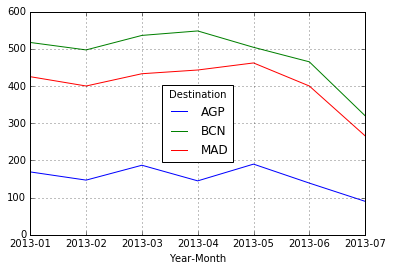

In [71]:

sFilter_gr=sFilter.reset_index().groupby(['Year-Month', 'Destination']).count().reset_index()
sFilter_gr.rename(columns={'index':'Num Searches'}, inplace=True)


In [64]:
sFilter_gr.head()

,Year-Month,Destination,index
0,2013-01,AGP,7
1,2013-01,BCN,26
2,2013-01,MAD,11


#### Aumentamos el tamaño del sample 

In [56]:
!bzcat /home/dsc/Data/challenge/searches.csv.bz2 | head -200000 > ./searches_sample2.csv



bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/searches.csv.bz2, output file = (stdout)


In [57]:
!bzip2 -f ./searches_sample2.csv

In [58]:
!pwd


/home/dsc/Repositories/M-ster---Data-Science


# Plotting 

In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [67]:
sFilter_gr.rename(columns={'index':'Num Searches'}, inplace=True)

In [68]:
prepared_df=sFilter_gr.pivot('Year-Month','Destination','Num Searches')

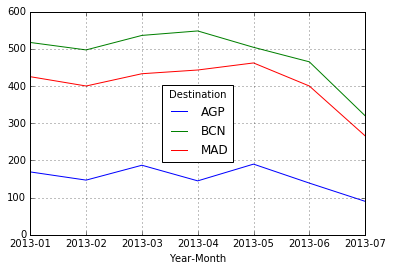

In [72]:
prepared_df.plot(grid=True)

In [73]:
import seaborn as sns

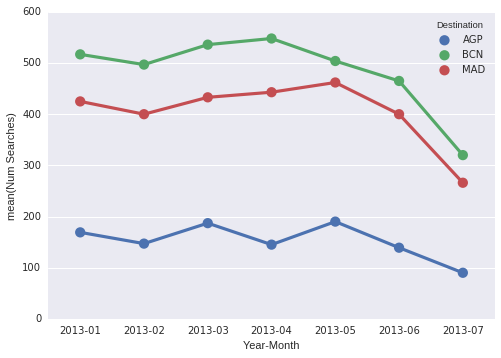

In [75]:
ax=sns.pointplot(x='Year-Month', y='Num Searches', hue='Destination', data=sFilter_gr)


In [76]:
ax.set(xlabel='Month', ylabel='Number of searches')

## Chunksize & append group by DF 

In [83]:
all_results_gr=all_results.groupby(['Year-Month','Destination']).sum().reset_index()

In [84]:
all_results_gr.rename(columns={'index':'Num Searches'}, inplace=True)

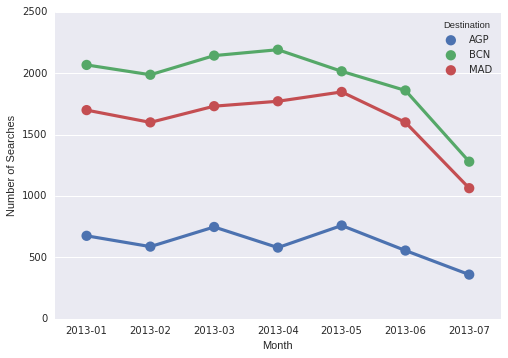

In [85]:
import seaborn as sns
ax=sns.pointplot(x='Year-Month',y='Num Searches', hue='Destination', data=all_results_gr)
ax.set(xlabel='Month', ylabel='Number of Searches')

Chunk 1 with size 1000000
Chunk 2 with size 1000000
Chunk 3 with size 1000000
Chunk 4 with size 1000000
Chunk 5 with size 1000000
Chunk 6 with size 1000000
Chunk 7 with size 1000000
Chunk 8 with size 1000000
Chunk 9 with size 1000000
Chunk 10 with size 1000000
Chunk 11 with size 1000000
Chunk 12 with size 1000000
Chunk 13 with size 1000000
Chunk 14 with size 1000000
Chunk 15 with size 1000000
Chunk 16 with size 1000000
Chunk 17 with size 1000000
Chunk 18 with size 1000000
Chunk 19 with size 1000000
Chunk 20 with size 1000000
Chunk 21 with size 390198
CPU times: user 3min 10s, sys: 4.19 s, total: 3min 14s
Wall time: 3min 18s


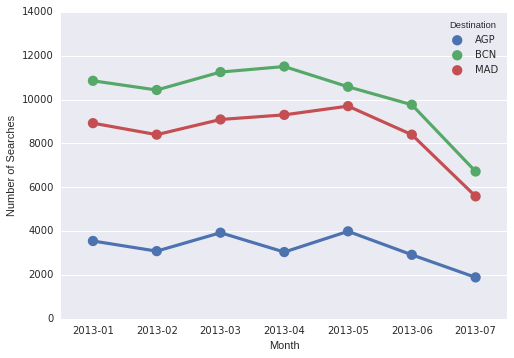

In [88]:
%%time
sc=pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', sep='^',usecols=['Date','Destination'], chunksize=1000000)

all_results=pd.DataFrame()


for i, chunk in enumerate(sc):
    print "Chunk %d with size %d"%(i+1, len(chunk))
    s = s.dropna()
    sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
    sFilter['Year-Month']=sFilter['Date'].str[0:7]
    sFilter.drop('Date', axis=1, inplace=True)
    sFilter_gr=sFilter.reset_index().groupby(['Year-Month', 'Destination']).count().reset_index()
    all_results=all_results.append(sFilter_gr)

all_results_gr=all_results.groupby(['Year-Month','Destination']).sum().reset_index()
all_results_gr.rename(columns={'index':'Num Searches'}, inplace=True)
ax=sns.pointplot(x='Year-Month',y='Num Searches', hue='Destination', data=all_results_gr)
ax.set(xlabel='Month', ylabel='Number of Searches')

#sFilter_gr.rename(columns={'index':'Num Searches'}, inplace=True)
#prepared_df=sFilter_gr.pivot('Year-Month','Destination','Num Searches')
#prepared_df.plot(grid=True)

# Booking 

In [89]:
import pandas as pd

In [90]:
cd ~/Data/challenge/

/home/dsc/Data/challenge


In [98]:
bc = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', sep='^',chunksize=300000, low_memory=False)

In [99]:
all_chunks=pd.DataFrame()
for i, chunk in enumerate(bc):
    all_chunks=all_chunks.append(chunk)
    all_chunks=all_chunks.drop_duplicates()
    print "Chunk %d, keeping %d lines"%(i+1, len(all_chunks))

Chunk 1, keeping 299999 lines
Chunk 2, keeping 358999 lines
Chunk 3, keeping 358999 lines
Chunk 4, keeping 358999 lines
Chunk 5, keeping 658992 lines
Chunk 6, keeping 718002 lines
Chunk 7, keeping 718002 lines
Chunk 8, keeping 718002 lines
Chunk 9, keeping 718002 lines
Chunk 10, keeping 718002 lines
Chunk 11, keeping 718002 lines
Chunk 12, keeping 718002 lines
Chunk 13, keeping 718002 lines
Chunk 14, keeping 718002 lines
Chunk 15, keeping 718002 lines
Chunk 16, keeping 718002 lines
Chunk 17, keeping 718002 lines
Chunk 18, keeping 718002 lines
Chunk 19, keeping 718002 lines
Chunk 20, keeping 718002 lines
Chunk 21, keeping 718002 lines
Chunk 22, keeping 718002 lines
Chunk 23, keeping 718002 lines
Chunk 24, keeping 718002 lines
Chunk 25, keeping 718002 lines
Chunk 26, keeping 718002 lines
Chunk 27, keeping 718002 lines
Chunk 28, keeping 718002 lines
Chunk 29, keeping 718002 lines
Chunk 30, keeping 718002 lines
Chunk 31, keeping 718002 lines
Chunk 32, keeping 718002 lines
Chunk 33, keeping

In [100]:
all_chunks.to_csv('./searches.no_dup.csv', sep='^', index=False)

In [101]:
!bzip2 -f searches.no_dup.csv

 # Preparing for 

### We have seen that we have white space in some columns... 

1) Bookings: [act_date, dep_port, arr_port]
   Searches: [search_date, origin, destination]

2) dates de string a datetime object
3) remove whitespaces (from column names and content)
4) remove NaN
5) match Bookings % Searches -> put 1 if search_date, O&D == booking_date, =&D

In [102]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [103]:
import pandas as pd

In [106]:
b = pd.read_csv('./bookings.no_dup.csv.bz2', sep='^', usecols=['act_date           ','arr_port','dep_port'])

In [105]:
b.columns.tolist()

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [107]:
s = pd.read_csv('./searches.no_dup.csv.bz2', sep='^', usecols=['Date','Origin','Destination'])

In [108]:
b.iloc[0].tolist()

['2013-03-05 00:00:00', 'ZRH     ', 'LHR     ']

In [109]:
s.iloc[0].tolist()

['2013-01-01', 'TXL', 'AUH']

## Search 

In [110]:
b.iloc[0]['arr_port'].strip()

'LHR'

In [111]:
b['arr_port']=b['arr_port'].map(lambda x:str(x).strip())

In [112]:
b['dep_port']=b['dep_port'].map(lambda x:str(x).strip())

In [113]:
b.iloc[0].tolist()

['2013-03-05 00:00:00', 'ZRH', 'LHR']

In [114]:
b.columns=b.columns.str.strip()

In [115]:
b.columns.tolist()

['act_date', 'dep_port', 'arr_port']

In [118]:
b['act_date']=b['act_date'].str[0:10].head()

In [119]:
b.iloc[0].tolist()

['2013-03-05', 'ZRH', 'LHR']

In [120]:
s.iloc[0].tolist()

['2013-01-01', 'TXL', 'AUH']

In [123]:
b = pd.read_csv('./bookings.no_dup.csv.bz2', sep='^', usecols=['act_date           ','arr_port','dep_port'])
s = pd.read_csv('./searches.no_dup.csv.bz2', sep='^', usecols=['Date','Origin','Destination'])
b['arr_port']=b['arr_port'].str.strip()
b['dep_port']=b['dep_port'].map(lambda x:str(x).strip())
b.columns=b.columns.str.strip()
b['act_date']=b['act_date'].str[0:10]

print "before drop b=%d, s=%d"%(len(b),len(s))
b=b.dropna()
s=s.dropna()
print "after drop b=%d, s=%d"%(len(b),len(s))

before drop b=1299993, s=718003
after drop b=1299993, s=718002


In [128]:
b_gr=b.reset_index().groupby(['dep_port','arr_port','act_date']).count().reset_index()

In [129]:
b_gr.head()

,dep_port,arr_port,act_date,index
0,AAB,ROV,2013-05-29,2
1,AAB,ROV,2013-08-24,2
2,AAE,ALG,2013-01-07,1
3,AAE,ALG,2013-01-08,2
4,AAE,ALG,2013-01-09,6


In [130]:
s_with_index = s.reset_index()

In [131]:
s_with_index.tail()

,index,Date,Origin,Destination
717997,717998,2013-05-03,CPH,AYT
717998,717999,2013-05-03,NYC,YTO
717999,718000,2013-05-03,TRF,TRD
718000,718001,2013-05-03,IAH,RDU
718001,718002,2013-10-13,VIE,HA


In [133]:
s_with_b = s_with_index.merge(b_gr,how='left',left_on=['Date', 'Origin', 'Destination'], right_on=['act_date','dep_port','arr_port'])

In [134]:
len(s_with_index)

718002

In [135]:
len(s_with_b)

718002

In [136]:
s_with_b.head()

,index_x,Date,Origin,Destination,dep_port,arr_port,act_date,index_y
0,0,2013-01-01,TXL,AUH,NaN,NaN,NaN,NaN
1,1,2013-01-01,ATH,MIL,NaN,NaN,NaN,NaN
2,2,2013-01-01,ICT,SFO,NaN,NaN,NaN,NaN
3,3,2013-01-01,RNB,ARN,NaN,NaN,NaN,NaN
4,4,2013-01-01,OSL,MAD,NaN,NaN,NaN,NaN


In [137]:
s_with_b[s_with_b['index_y']>0].head()

,index_x,Date,Origin,Destination,dep_port,arr_port,act_date,index_y
23,23,2013-01-01,DUS,IST,DUS,IST,2013-01-01,1.0
27,27,2013-01-01,RUH,JED,RUH,JED,2013-01-01,17.0
40,40,2013-01-01,DMM,MNL,DMM,MNL,2013-01-01,1.0
59,59,2013-01-01,ATL,MIA,ATL,MIA,2013-01-01,4.0
94,94,2013-01-01,DXB,KUL,DXB,KUL,2013-01-01,1.0


In [139]:
s_file = pd.read_csv('./searches.no_dup.csv.bz2', sep='^', low_memory=False)

In [140]:
result=s_file.merge(s_with_b, how='left', left_index=True, right_on='index_x')

In [141]:
result.tail()

,Date_x,Time,TxnCode,OfficeID,Country,Origin_x,Destination_x,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,index_x,Date_y,Origin_y,Destination_y,dep_port,arr_port,act_date,index_y
717997,2013-05-03,10:28:25,MPT,01a4373dc0878961ab038a4089f8d4a7,DK,CPH,AYT,1.0,2.0,CPH,AYT,2013-08-03,NaN,NaN,AYT,CPH,2013-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH,717998,2013-05-03,CPH,AYT,NaN,NaN,NaN,NaN
717998,2013-05-03,15:00:52,MPT,4e93208c7efe7d16455c6a887367cdbd,US,NYC,YTO,0.0,1.0,NYC,YTO,2013-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,DCA,717999,2013-05-03,NYC,YTO,NaN,NaN,NaN,NaN
717999,2013-05-03,00:40:36,FXP,439c0bb10ec8b58c68da567c40399a05,NO,TRF,TRD,0.0,1.0,TRF,TRD,2013-08-01,HP,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,718000,2013-05-03,TRF,TRD,NaN,NaN,NaN,NaN
718000,2013-05-03,21:10:30,MPT,3561a60621de06ab1badc8ca55699ef3,US,IAH,RDU,1.0,2.0,IAH,RDU,2013-07-04,NaN,NaN,RDU,IAH,2013-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,718001,2013-05-03,IAH,RDU,NaN,NaN,NaN,NaN
718001,2013-10-13,18:57:54,MTP,e41c9d833aa74600552f2ed688b67d81,AT,VIE,HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,718002,2013-10-13,VIE,HA,NaN,NaN,NaN,NaN
